# SARIMA モデルの自己回帰 (AR) コンポーネントと移動平均 (MA) コンポーネントの選択

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

株価は日次で記録されます。<br>日本では、年間平均 244 営業日あります。<br>したがって、季節期間は 244 日です。

PACF プロットから、AR 項は 1 であることがわかります。<br>
この情報を使用する場合、価格はランダム ウォークであると想定します。つまり、AR1 モデルです。 <br>
株価が単なるランダム ウォークであると想定するよりも優れた、単純な SARIMA モデルを構築したいと考えています。<br>

In [6]:
cleandata = pd.read_csv('time-series-prediction\price_clean_full_asc.csv',parse_dates=True,index_col='date')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\user\AppData\Local\Temp\ipykernel_28488\288528175.py:1: SyntaxWarning: invalid escape sequence '\p'
  cleandata = pd.read_csv('time-series-prediction\price_clean_full_asc.csv',parse_dates=True,index_col='date')


2004年以降のデータのみ使用

In [10]:
cleandata[['close']].iloc[4200]

close    50.5
Name: 2004-02-25 00:00:00, dtype: float64

1000日間のデータを使用してモデルをトレーニングすることで、モデルのトレーニング時間を短縮し、カーネルが応答しない問題を修正します。

# SARIMA

In [29]:
# Define SARIMA parameters
p, d, q = 1, 0, 0
P, D, Q, s = 1, 0, 0, 244  # Assuming 1year = 244 trading days

# Fit the SARIMA model
simplemodel = SARIMAX(cleandata[['close']].iloc[4200:5200], order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_stationarity=0, enforce_invertibility=0,)
simpleresult = simplemodel.fit()

c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [30]:
simpleresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               close   No. Observations:                 1000
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 244)   Log Likelihood                -906.768
Date:                             Wed, 01 Jan 2025   AIC                           1819.537
Time:                                     22:17:10   BIC                           1833.417
Sample:                                          0   HQIC                          1824.883
                                            - 1000                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.001   1885.586      0.000       0.999       1.001
ar.S.L244     -0.0021      0.036     -0.059      0.953      -0.073       0.069
sigma2         0.6467      0.023     27.922      0.000       0.601       0.692
===================================================================================
Ljung-Box (L1) (Q):                   2.96   Jarque-Bera (JB):               181.40
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.07
Prob(H) (two-sided):                  0.18   Kurtosis:                         5.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

今後20日間の予測

c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


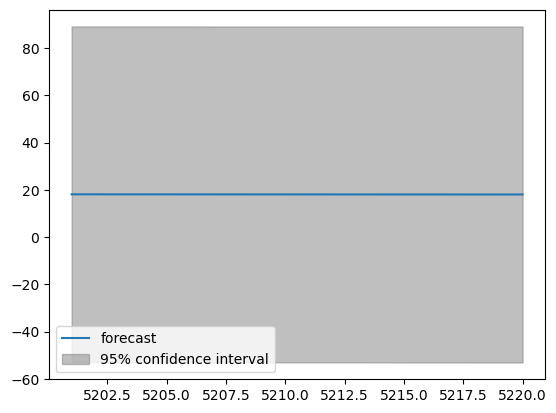

In [32]:
plot_predict(simpleresult, start=5201,end=5220, dynamic=True);

実データ

<Axes: xlabel='date'>

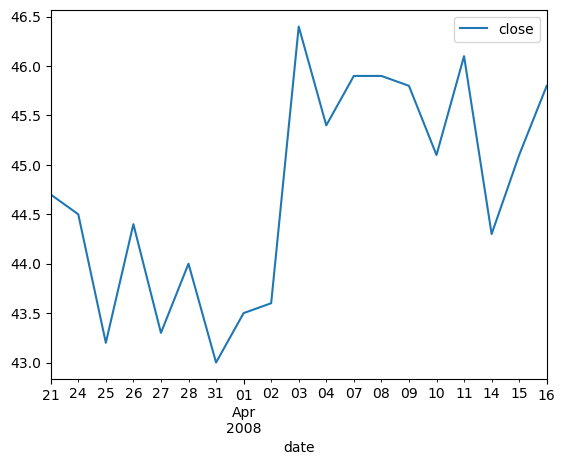

In [33]:
cleandata[['close']].iloc[5201:5220].plot()

In [34]:
simpleresult.save('simpleARIMA')

In [14]:
simpleresult = SARIMAXResults.load('simpleARIMA')

1年間の予測をプロットする (200日間の予測)

c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


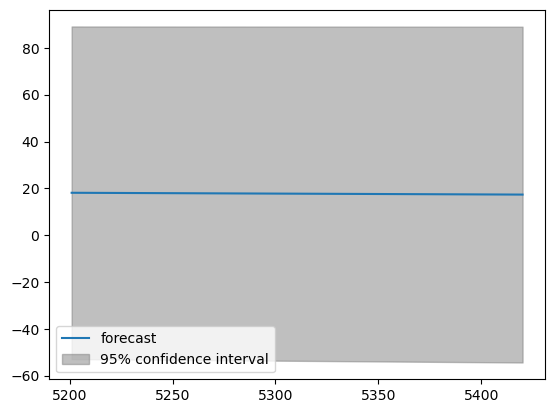

In [15]:
plot_predict(simpleresult, start=5201,end=5420, dynamic=True);

実データ

<Axes: xlabel='date'>

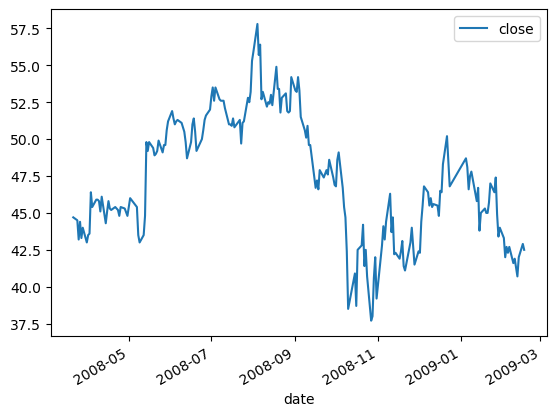

In [16]:
cleandata[['close']].iloc[5201:5420].plot()

# AR1モデルとの比較

In [2]:
from statsmodels.tsa.arima.model import ARIMA

In [7]:
modelar1 = ARIMA(cleandata[['close']].iloc[4200:5200], order = (1,0,0))

fitar1 = modelar1.fit()

fitar1.summary()

c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1258.108
Date:                Thu, 02 Jan 2025   AIC                           2522.216
Time:                        14:57:37   BIC                           2536.939
Sample:                             0   HQIC                          2527.812
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8791      2.669     19.435      0.000      46.647      57.111
ar.L1          0.9887      0.005    187.708      0.000       0.978       0.999
sigma2         0.7222      0.020     35.471      0.000       0.682       0.762
===================================================================================
Ljung-Box (L1) (Q):                   2.28   Jarque-Bera (JB):               395.77
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.02
Prob(H) (two-sided):                  0.26   Kurtosis:                         6.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

今後20日間の予測

c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


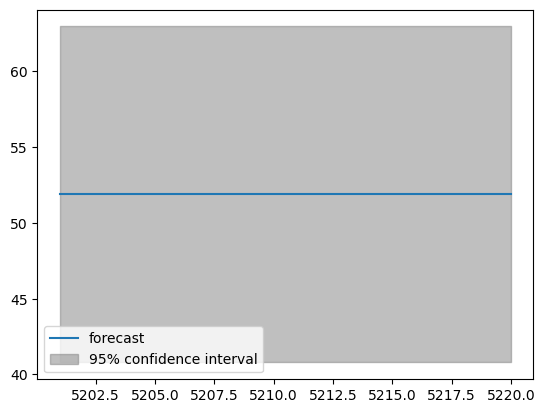

In [9]:
plot_predict(fitar1, start=5201,end=5220, dynamic=True);

<Axes: xlabel='date'>

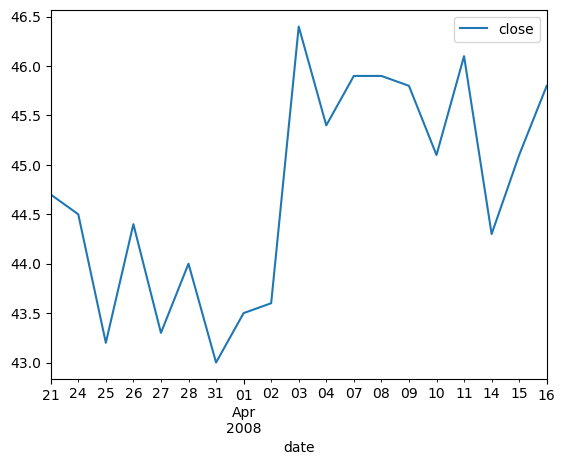

In [10]:
cleandata[['close']].iloc[5201:5220].plot()

1年間の予測をプロットする (200日間の予測)

c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


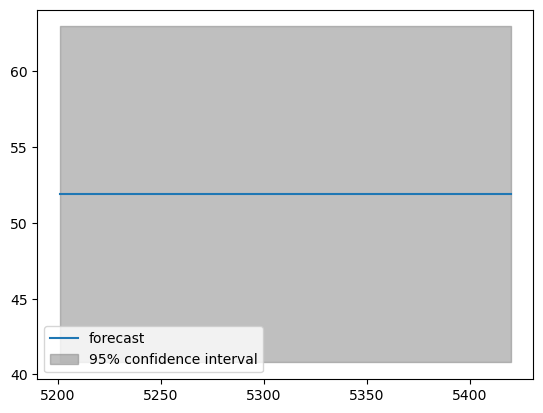

In [17]:
plot_predict(fitar1, start=5201,end=5420, dynamic=True);

実データ

<Axes: xlabel='date'>

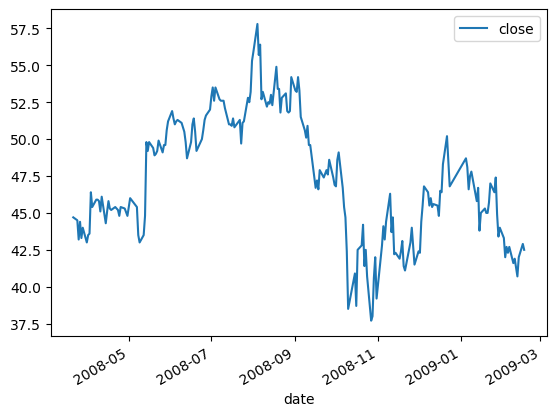

In [18]:
cleandata[['close']].iloc[5201:5420].plot()